In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [23]:
# Load the dataset
df = pd.read_csv("dataset.csv")

In [24]:
# Step 1: Impute 'No Info' in 'smoking_history' using the most frequent value (mode)
imputer = SimpleImputer(strategy='most_frequent')

# Perform imputation and flatten the result before assignment
df['smoking_history'] = imputer.fit_transform(df[['smoking_history']]).ravel()

# Check if the imputation worked
print(df['smoking_history'].value_counts())

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [25]:
# Verify imputation
print("Smoking history after imputation:")
print(df['smoking_history'].value_counts())

Smoking history after imputation:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_25136\3928929437.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['bmi'], df_no_outliers['bmi']], labels=['Original BMI', 'No Outliers'])


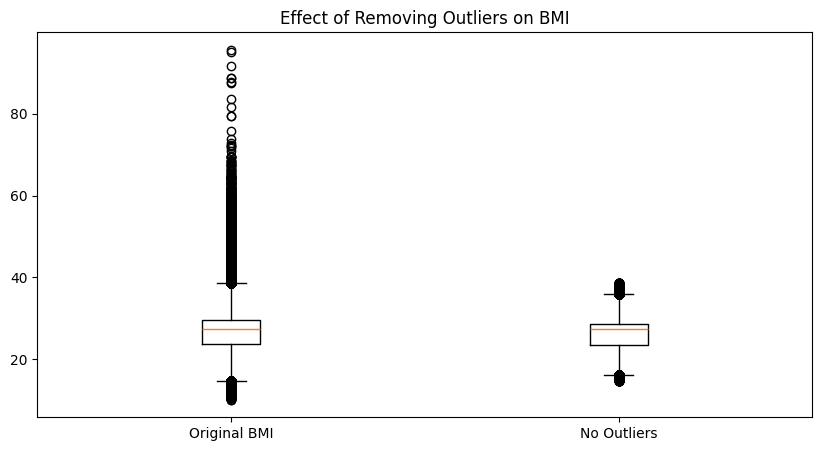

In [26]:
# Step 2: Handle Outliers in 'bmi' using IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR)))]

plt.figure(figsize=(10, 5))
plt.boxplot([df['bmi'], df_no_outliers['bmi']], labels=['Original BMI', 'No Outliers'])
plt.title('Effect of Removing Outliers on BMI')
plt.show()

In [27]:
# Fit the scaler on both columns at once to normalize together
scaler = MinMaxScaler()

# Apply normalization
df_no_outliers[['bmi_normalized', 'HbA1c_normalized']] = scaler.fit_transform(df_no_outliers[['bmi', 'HbA1c_level']])


C:\Users\ACER\AppData\Local\Temp\ipykernel_25136\951990534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[['bmi_normalized', 'HbA1c_normalized']] = scaler.fit_transform(df_no_outliers[['bmi', 'HbA1c_level']])
C:\Users\ACER\AppData\Local\Temp\ipykernel_25136\951990534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[['bmi_normalized', 'HbA1c_normalized']] = scaler.fit_transform(df_no_outliers[['bmi', 'HbA1c_level']])


In [28]:
# Step 4: Encode categorical variables
label_encoder = LabelEncoder()
df_no_outliers['gender'] = label_encoder.fit_transform(df_no_outliers['gender'])  # Female: 0, Male: 1
df_no_outliers['smoking_history'] = label_encoder.fit_transform(df_no_outliers['smoking_history'])  # Encode smoking history

C:\Users\ACER\AppData\Local\Temp\ipykernel_25136\2445888650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['gender'] = label_encoder.fit_transform(df_no_outliers['gender'])  # Female: 0, Male: 1
C:\Users\ACER\AppData\Local\Temp\ipykernel_25136\2445888650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['smoking_history'] = label_encoder.fit_transform(df_no_outliers['smoking_history'])  # Encode smoking history


In [29]:
# Step 5: Discretize 'age' into categories
age_bins = [0, 18, 35, 60, 100]
age_labels = ['Child', 'Youth', 'Adult', 'Senior']
df_no_outliers['age_group'] = pd.cut(df_no_outliers['age'], bins=age_bins, labels=age_labels)

C:\Users\ACER\AppData\Local\Temp\ipykernel_25136\1259296846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['age_group'] = pd.cut(df_no_outliers['age'], bins=age_bins, labels=age_labels)


In [30]:
# Step 6: Categorize BMI according to WHO classification
bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df_no_outliers['bmi_category'] = pd.cut(df_no_outliers['bmi'], bins=bmi_bins, labels=bmi_labels)

C:\Users\ACER\AppData\Local\Temp\ipykernel_25136\2608228628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['bmi_category'] = pd.cut(df_no_outliers['bmi'], bins=bmi_bins, labels=bmi_labels)


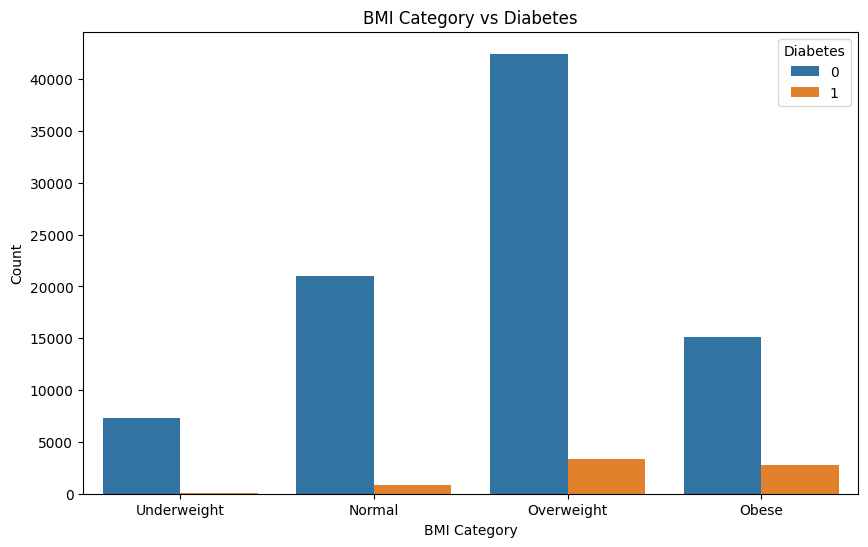

In [31]:
# Visualize the relationship between 'bmi_category' and 'diabetes'
plt.figure(figsize=(10, 6))
sns.countplot(x=df_no_outliers['bmi_category'], hue=df_no_outliers['diabetes'])
plt.title('BMI Category vs Diabetes')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Diabetes', loc='upper right')
plt.show()

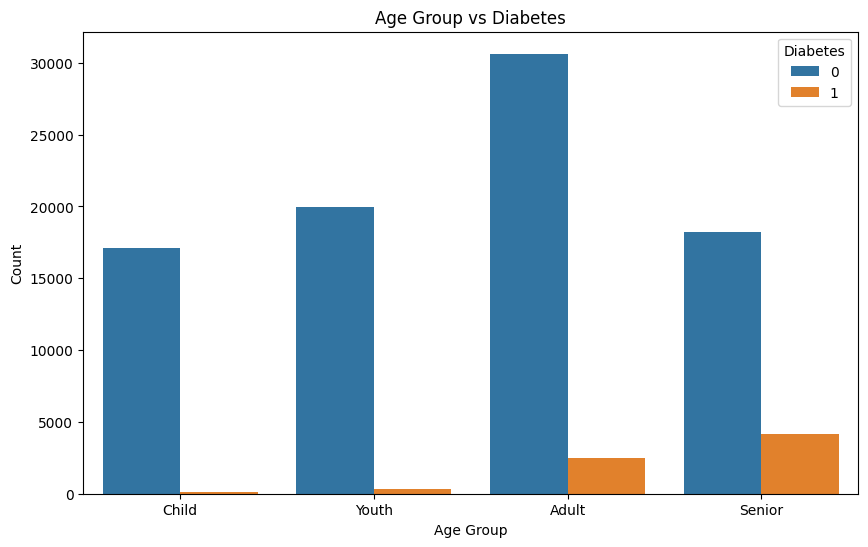

In [32]:
# Visualize the relationship between 'age_group' and 'diabetes'
plt.figure(figsize=(10, 6))
sns.countplot(x=df_no_outliers['age_group'], hue=df_no_outliers['diabetes'])
plt.title('Age Group vs Diabetes')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes', loc='upper right')
plt.show()

In [33]:
# Step 7: Handle class imbalance using SMOTE
X = df_no_outliers.drop(columns=['diabetes', 'bmi', 'HbA1c_level', 'age_group', 'bmi_category'])  # Features
y = df_no_outliers['diabetes']  # Target variable

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [34]:
# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [35]:


# List of models to train one by one
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    # ('Support Vector Machine', SVC(probability=True)),
    ('k-Nearest Neighbors', KNeighborsClassifier())
]

# Initialize variables to store the best model details
best_accuracy = 0
best_model_name = ""
best_model = None

# Train models one by one
for name, model in models:
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Output the results
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(f'{name} Classification Report:\n {classification_report(y_test, y_pred)}')
    
    # Check if the current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model
        print(f'-> {name} is the best model so far with accuracy: {best_accuracy:.2f}')
    else:
        print(f'-> {name} did not outperform the current best model.')

# After all models are trained and evaluated
print(f'\nThe best model is: {best_model_name} with an accuracy of {best_accuracy:.2f}')



Training Decision Tree...
Decision Tree Accuracy: 0.97
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17113
           1       0.97      0.97      0.97     17244

    accuracy                           0.97     34357
   macro avg       0.97      0.97      0.97     34357
weighted avg       0.97      0.97      0.97     34357

-> Decision Tree is the best model so far with accuracy: 0.97

Training Random Forest...
Random Forest Accuracy: 0.97
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17113
           1       0.97      0.97      0.97     17244

    accuracy                           0.97     34357
   macro avg       0.97      0.97      0.97     34357
weighted avg       0.97      0.97      0.97     34357

-> Random Forest is the best model so far with accuracy: 0.97

Training Logistic Regression...
L

In [36]:
from sklearn.model_selection import cross_val_score

# Apply cross-validation with 5 folds (you can change to 10 folds as well)
for name, model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # cv=5 for 5-fold cross-validation
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"{name} Mean Accuracy: {scores.mean():.2f}")
    print(f"{name} Standard Deviation: {scores.std():.2f}\n")


Decision Tree Cross-Validation Scores: [0.95614271 0.95646559 0.95339827 0.95490502 0.95361102]
Decision Tree Mean Accuracy: 0.95
Decision Tree Standard Deviation: 0.00

Random Forest Cross-Validation Scores: [0.97336275 0.97325513 0.97174837 0.97379325 0.97319987]
Random Forest Mean Accuracy: 0.97
Random Forest Standard Deviation: 0.00

Logistic Regression Cross-Validation Scores: [0.96389173 0.96389173 0.9642146  0.96356885 0.96388979]
Logistic Regression Mean Accuracy: 0.96
Logistic Regression Standard Deviation: 0.00

k-Nearest Neighbors Cross-Validation Scores: [0.95275252 0.9526987  0.95216058 0.95296777 0.95404155]
k-Nearest Neighbors Mean Accuracy: 0.95
k-Nearest Neighbors Standard Deviation: 0.00



In [37]:
# Step 10: Make predictions on sample data
sample_data = pd.DataFrame({
    'gender': [0, 1],
    'age': [50, 30],
    'hypertension': [0, 1],
    'heart_disease': [0, 0],
    'smoking_history': [3, 2],
    'blood_glucose_level': [140, 160],
    'bmi_normalized': scaler.transform([[25], [30]]).flatten(),
    'HbA1c_normalized': scaler.transform([[5.5], [6.0]]).flatten()
})

# Predict using the best model
sample_predictions = best_model.predict(sample_data)
print(f'Sample Predictions: {sample_predictions}')

c:\Users\ACER\Desktop\FDM_Project\FDM_latest\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but MinMaxScaler is expecting 2 features as input.

In [21]:
# Step 11: Save the best model and scaler
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)